<a href="https://colab.research.google.com/github/yeonsikC/Deep-Learning-with-Keras-Founders/blob/master/DL_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 실습 시작

In [0]:
from keras import models
from keras import layers

# Sequential형
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(784,)))
model.add(layers.Dense(10, activation = 'softmax'))

Using TensorFlow backend.


In [0]:
# 함수형
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(inputs = input_tensor, outputs = output_tensor)

In [0]:
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss='mse',
#               metrics=['accuracy'])
# model.fit(input_tensor, output_tensor, batch_size=128, epochs=10)

# 영화 리뷰 분류 : 이진 분류 예제

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [0]:
train_labels[0]

1

In [0]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
# 숫자를 단어로 매핑
word_index = imdb.get_word_index() # word_index = BOW
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # '?'가 뭐지?? 

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
# 데이터 준비 , 리스트 -> 텐서
# 정수 시퀀스를 이진 행렬로 인코딩하기

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data) #훈련데이터를 벡터화
x_test = vectorize_sequences(test_data) #테스트데이터를 벡터화

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
#신경망 모델 만들기
# relu 활성화 함수는 딥러닝에서 가장 인기 있는 활성화 함수
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
# binary-crossentropy : 이진 분류 문제, 신경망의 출력이 확률이기 때문에 손실함수로 적합, mean_squared_error도 있음(mse)
# 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택이다.
# 크로스엔트로피 : 확률 분포 간의 차이를 측정한다. (원본분포와 예측분포 사이를 측정)
# 모델 컴파일하기

model.compile(optimizer='rmsprop', # optimizers.RMSprop(lr=0.001) 처럼 매개변수를 지정할 때 사용
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# model.fit은 History 객체를 반환함
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 2s 143us/step - loss: 0.5088 - acc: 0.7844 - val_loss: 0.3847 - val_acc: 0.8642
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2993 - acc: 0.9062 - val_loss: 0.3410 - val_acc: 0.8591
Epoch 3/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.2207 - acc: 0.9260 - val_loss: 0.2767 - val_acc: 0.8915
Epoch 4/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1736 - acc: 0.9438 - val_loss: 0.2797 - val_acc: 0.8877
Epoch 5/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1407 - acc: 0.9563 - val_loss: 0.2817 - val_acc: 0.8874
Epoch 6/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1163 - acc: 0.9633 - val_loss: 0.2937 - val_acc: 0.8856
Epoch 7/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0975 - acc: 0.9714 - val_loss: 0.3229 

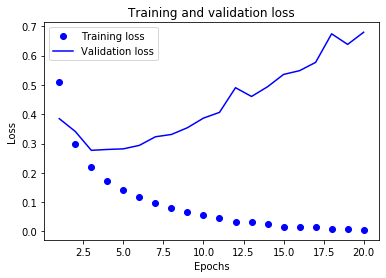

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss') # bo는 파란색 점을 의미
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') # b는 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

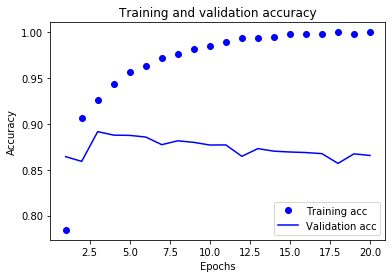

In [0]:
plt.clf() # 그래프를 초기화한다.
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.4433 - acc: 0.8281
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.2621 - acc: 0.9089
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2017 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 2s 85us/step


In [0]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 78us/step


[0.2901100524044037, 0.88504]

In [0]:
model.predict(x_test)

array([[0.20408407],
       [0.9999223 ],
       [0.84951836],
       ...,
       [0.11066487],
       [0.07177949],
       [0.67150974]], dtype=float32)

# layer을 2에서 1로 줄여보자!

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.4531 - acc: 0.8261
Epoch 2/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2800 - acc: 0.9076
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2224 - acc: 0.9236
Epoch 4/4
25000/25000 [==============================] - 2s 77us/step


In [0]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 72us/step


[0.2796249929714203, 0.88804]

In [0]:
model.predict(x_test)

array([[0.234321  ],
       [0.9990938 ],
       [0.8895353 ],
       ...,
       [0.1448287 ],
       [0.10541713],
       [0.50418824]], dtype=float32)

# layer을 2에서 3으로 늘려보자!

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.4405 - acc: 0.8152
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2507 - acc: 0.9084
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.1946 - acc: 0.9279
Epoch 4/4
25000/25000 [==============================] - 2s 78us/step


In [0]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 70us/step


[0.31183319145202637, 0.87968]

In [0]:
model.predict(x_test)

array([[0.20209426],
       [0.9999729 ],
       [0.9700789 ],
       ...,
       [0.13471362],
       [0.08202022],
       [0.78395885]], dtype=float32)

# 레이어 2, 유닛 수 32개

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 164us/step - loss: 0.4203 - acc: 0.8190
Epoch 2/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.2403 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.1901 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 4s 152us/step


In [0]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 85us/step


[0.3334533141708374, 0.87152]

In [0]:
model.predict(x_test)

array([[0.14805293],
       [0.9998992 ],
       [0.6627844 ],
       ...,
       [0.11715287],
       [0.03353629],
       [0.5008956 ]], dtype=float32)

# 레이어 3, 유닛 수 *64개*

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 139us/step - loss: 0.4365 - acc: 0.8035
Epoch 2/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.2533 - acc: 0.9020
Epoch 3/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.1955 - acc: 0.9236
Epoch 4/4
25000/25000 [==============================] - 2s 94us/step


In [0]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 93us/step


[0.3691492634296417, 0.86708]

In [0]:
model.predict(x_test)

array([[0.08399662],
       [0.9998456 ],
       [0.6569927 ],
       ...,
       [0.04904139],
       [0.02312928],
       [0.46774295]], dtype=float32)

In [0]:
import keras
keras.__version__

'2.2.5'

# 뉴스 기사 분류 / 다중 분류 모델

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10][:5]

[1, 245, 273, 207, 156]

In [5]:
# 단어로 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# dict.get에 있는 '?'는 가져올 값이 없을 때 가져올 값을 지정해줌.
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [6]:
train_labels[10]

3

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [0]:
# 위에 대한 케라스 내장 함수가 있음
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
#모델 구축

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 10s 1ms/step - loss: 2.6408 - acc: 0.5440 - val_loss: 1.7250 - val_acc: 0.6530
Epoch 2/20
7982/7982 [==============================] - 0s 55us/step - loss: 1.4089 - acc: 0.7110 - val_loss: 1.3083 - val_acc: 0.7280
Epoch 3/20
7982/7982 [==============================] - 0s 57us/step - loss: 1.0523 - acc: 0.7722 - val_loss: 1.1466 - val_acc: 0.7510
Epoch 4/20
7982/7982 [==============================] - 0s 56us/step - loss: 0.8332 - acc: 0.8166 - val_loss: 1.0465 - val_acc: 0.7670
Epoch 5/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.6628 - acc: 0.8576 - val_loss: 0.9859 - val_acc: 0.7990
Epoch 6/20
7982/7982 [==============================] - 0s 55us/step - loss: 0.5330 - acc: 0.8901 - val_loss: 0.9508 - val_acc: 0.8060
Epoch 7/20
7982/7982 [==================

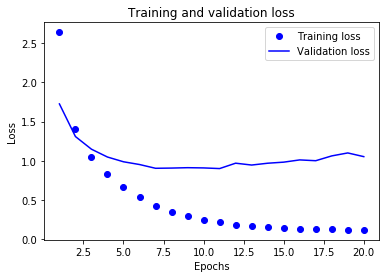

In [13]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

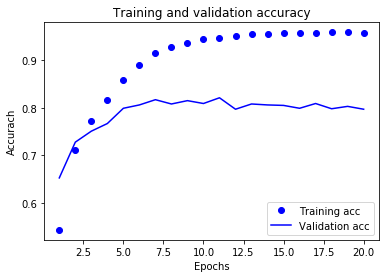

In [14]:
#훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accurach')
plt.legend()

plt.show()

In [15]:
#모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 81us/step - loss: 2.6161 - acc: 0.5425 - val_loss: 1.7494 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 0s 56us/step - loss: 1.4155 - acc: 0.7105 - val_loss: 1.3060 - val_acc: 0.7280
Epoch 3/9
7982/7982 [==============================] - 0s 55us/step - loss: 1.0398 - acc: 0.7840 - val_loss: 1.1388 - val_acc: 0.7630
Epoch 4/9
7982/7982 [==============================] - 0s 55us/step - loss: 0.8182 - acc: 0.8311 - val_loss: 1.0357 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 0s 56us/step - loss: 0.6572 - acc: 0.8675 - val_loss: 0.9739 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 0s 53us/step - loss: 0.5250 - acc: 0.8969 - val_loss: 1.0163 - val_acc: 0.7690
Epoch 7/9
7982/7982 [==============================] - 0s 52us/step - loss: 0.4301 - acc: 0.9117 - val_loss: 0.9242 - val_acc: 0.8160
Epoch 8/9
7982

In [0]:
results

[1.054163360213554, 0.7769367765180787]

In [0]:
#무작위로 데이터를 분류하면 확률이 18%
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17898486197684774

In [0]:
# 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

In [0]:
predictions[0].shape

(46,)

In [0]:
np.sum(predictions[0])

1.0000001

In [0]:
np.argmax(predictions[0])

4

In [0]:
# 레이블과 손실을 다루는 방법
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# categorical_crossentropy : 레이블이 범주형 인코딩일 때 사용
# sparse_categorical_crossentropy : 정수 레이블에 사용(수학적으로는 동일하고 인터페이스만 다름)
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

# 충분히 큰 중간층을 두어야 하는 이유

In [0]:
# 46차원보다 훨씬 작은 중간층(예를 들어 4차원)을 두면 정보의 병목이 어떻게 나타나는지 확인해보자
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

# 결과, 정확도가 8%정도 감소함. -> 고차원을 너무 저차원으로 압축했기 때문.

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 199us/step - loss: 3.3407 - acc: 0.1166 - val_loss: 2.8050 - val_acc: 0.1830
Epoch 2/20
7982/7982 [==============================] - 1s 162us/step - loss: 2.0619 - acc: 0.5093 - val_loss: 1.6771 - val_acc: 0.6720
Epoch 3/20
7982/7982 [==============================] - 1s 157us/step - loss: 1.3314 - acc: 0.6992 - val_loss: 1.4017 - val_acc: 0.6750
Epoch 4/20
7982/7982 [==============================] - 1s 158us/step - loss: 1.1179 - acc: 0.7256 - val_loss: 1.3347 - val_acc: 0.6990
Epoch 5/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.9898 - acc: 0.7573 - val_loss: 1.3087 - val_acc: 0.6980
Epoch 6/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.8972 - acc: 0.7714 - val_loss: 1.3180 - val_acc: 0.6990
Epoch 7/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.8211 - acc: 0.7785 - val_loss: 1.3154 - val_acc: 0.7020


In [0]:
# 추가실험 1. 작은 층 사용 32개의 유닛
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 190us/step - loss: 1.9292 - acc: 0.6071 - val_loss: 1.2937 - val_acc: 0.7100
Epoch 2/20
7982/7982 [==============================] - 1s 162us/step - loss: 1.0037 - acc: 0.7871 - val_loss: 1.0652 - val_acc: 0.7570
Epoch 3/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.6952 - acc: 0.8508 - val_loss: 0.9452 - val_acc: 0.7950
Epoch 4/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.5020 - acc: 0.8929 - val_loss: 0.8817 - val_acc: 0.8190
Epoch 5/20
7982/7982 [==============================] - 1s 163us/step - loss: 0.3680 - acc: 0.9166 - val_loss: 0.9038 - val_acc: 0.8260
Epoch 6/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.2849 - acc: 0.9342 - val_loss: 0.8817 - val_acc: 0.8320
Epoch 7/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.2355 - acc: 0.9451 - val_loss: 0.9168 - val_acc: 0.8270


In [0]:
# 추가실험 2. 더 큰 층 사용 128개의 유닛
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 217us/step - loss: 2.1839 - acc: 0.6082 - val_loss: 1.3840 - val_acc: 0.7100
Epoch 2/20
7982/7982 [==============================] - 1s 167us/step - loss: 1.0977 - acc: 0.7627 - val_loss: 1.0783 - val_acc: 0.7620
Epoch 3/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.7695 - acc: 0.8334 - val_loss: 0.9375 - val_acc: 0.7950
Epoch 4/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.5544 - acc: 0.8837 - val_loss: 0.8869 - val_acc: 0.8200
Epoch 5/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.4082 - acc: 0.9149 - val_loss: 0.8936 - val_acc: 0.8150
Epoch 6/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.3105 - acc: 0.9337 - val_loss: 0.9088 - val_acc: 0.8220
Epoch 7/20
7982/7982 [==============================] - 1s 174us/step - loss: 0.2510 - acc: 0.9430 - val_loss: 0.9122 - val_acc: 0.8180


In [0]:
# 추가실험 3. 은닉층을 늘려보자
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 228us/step - loss: 1.8166 - acc: 0.6041 - val_loss: 1.2774 - val_acc: 0.7050
Epoch 2/20
7982/7982 [==============================] - 1s 178us/step - loss: 1.0112 - acc: 0.7710 - val_loss: 1.0556 - val_acc: 0.7650
Epoch 3/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.6975 - acc: 0.8436 - val_loss: 0.9682 - val_acc: 0.7870
Epoch 4/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.4903 - acc: 0.8891 - val_loss: 0.9636 - val_acc: 0.7980
Epoch 5/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.3506 - acc: 0.9241 - val_loss: 1.0382 - val_acc: 0.7930
Epoch 6/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.2759 - acc: 0.9376 - val_loss: 0.9496 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.2246 - acc: 0.9458 - val_loss: 0.9982 - val_acc: 0.8090


In [0]:
# 추가실험 3. 은닉층을 줄여보자
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 219us/step - loss: 1.8229 - acc: 0.6510 - val_loss: 1.2121 - val_acc: 0.7350
Epoch 2/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.9334 - acc: 0.8046 - val_loss: 0.9694 - val_acc: 0.8040
Epoch 3/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.6345 - acc: 0.8726 - val_loss: 0.8622 - val_acc: 0.8200
Epoch 4/20
7982/7982 [==============================] - 1s 167us/step - loss: 0.4500 - acc: 0.9072 - val_loss: 0.8166 - val_acc: 0.8220
Epoch 5/20
7982/7982 [==============================] - 1s 165us/step - loss: 0.3343 - acc: 0.9275 - val_loss: 0.8006 - val_acc: 0.8300
Epoch 6/20
7982/7982 [==============================] - 1s 168us/step - loss: 0.2605 - acc: 0.9417 - val_loss: 0.8554 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.2130 - acc: 0.9485 - val_loss: 0.8351 - val_acc: 0.8320


# 정리
- N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 Dense 층의 크기는 N이어야 합니다.
- 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax 활성화 함수를 사용해야 합니다.
- 이런 문제에는 항상 범주형 크로스엔트로피를 사용해야 합니다. 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화합니다.
- 다중 분류에서 레이블을 다루는 두 가지 방법이 있다.
  * 레이블을 범주형 인코딩(또는 원-핫 인코딩)으로 인코딩하고 categorical_crossentropy 손실 함수를 사용한다.
  * 레이블을 정수로 인코딩하고 sparse_categorical_crossentropy 손실 함수를 사용한다.
- 많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야 한다.

# 주택 가격 예측 : 회귀 문제

In [4]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 3us/step


In [5]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

In [7]:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

상이한 스케일을 가진 값을 신경망에 주입하면 문제가 된다.
네트워크가 이런 데이터에 자동으로 맞출 수는 있지만 학습이 더 어려워진다.

이에 대해서는 '정규화' 작업을 해야한다. (X-E(x))/sigma ~ N(0,1)

In [0]:
# numpy를 이용하면 간단하게 가능함. 아래는 계산식을 나타냄
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [0]:
# 샘플 수가 적기 때문에 64갸의 유닛을 가진 2개의 은닉 층 사용.
# 훈련 데이터가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용.
from keras import models
from keras import layers

def build_model(): # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다.
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
                         input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # MAE : Mean Absolute Error
  return model # 선형회귀이므로 마지막에 어떠한 활성화 함수를 적용하면 안된다. 어떠한 범위라도 네트워크가 예측하도록 자유롭게 놔둬야 함.

In [10]:
# 데이터 개수가 너무 적으므로 검증 점수의 분산이 높다. -> K-fold 이용
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate( # 훈련 데이터 준비 : 다른 분할 전체
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
       axis=0)
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples:]],
       axis=0)
  
  model = build_model()
  
  # 모델 훈련(verbose=0이므로 훈련 과정 출력 X)
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 # 0












처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [11]:
# 에포크 수 100 -> 500
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate( # 훈련 데이터 준비 : 다른 분할 전체
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]],
       axis=0)
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples:]],
       axis=0)
  
  model = build_model()
  
  # 모델 훈련(verbose=0이므로 훈련 과정 출력 X)
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [0]:
average_mae_history = [
  np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

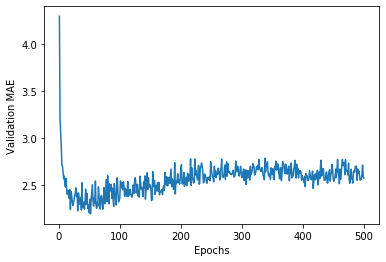

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) +1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

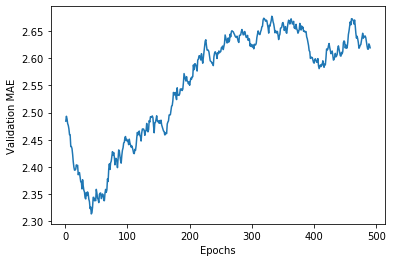

In [14]:
# 곡선을 좀 더 부드럽게 보기
# 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) +1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [15]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [16]:
test_mae_score

2.6855164322198606